# Functions


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from pytz import timezone
import regex as re

## PREPROCESSING PT2



In [1]:
df = pd.read_csv('depi.csv')

NameError: name 'pd' is not defined

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
columns = df.columns[df.notna().sum() == 0]
columns

In [ ]:
df.drop(columns, axis=1, inplace=True)

In [ ]:
columns = df.columns[df.notna().sum() == 0]
columns

In [ ]:
eg_holidays = holidays.EG(language='en_US')

def count_items_in_order(lineitem_Qty):
    return sum([int(x) for x in lineitem_Qty])

def get_holiday_name(date):
    return eg_holidays.get(date)


In [ ]:
df = pd.read_csv('depi_grouped.csv')

# UNDERSTANDING THE DATA

In [ ]:
df.head()

,Name,Created at,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Shipping Province,Shipping Province Name,Payment Method,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem quantity,Lineitem discount,Cancelled at,Refunded Amount
0,#MC14035,2022-11-01 00:32:29 +0200,1150.0,0.0,1150.0,95.0,Free Shipping,C,Cairo,Cash on Delivery (COD),Hand Towels ( 30cm x 30 cm ) - 30x30 / Off Whi...,"35.0, 115.0, 115.0, 120.0, 95.0, 95.0","nan, nan, nan, nan, nan, nan","2017982, 2017976, 2017976, 2020742, 2020741, 2...","10, 2, 1, 3, 1, 1","0.0, 0.0, 0.0, 0.0, 0.0, 95.0",NaN,0.0
1,#MC14036,2022-11-01 04:58:48 +0200,620.0,50.0,670.0,0.0,Shipping Rate,C,Cairo,Cash on Delivery (COD),Bath mat towel ( foot pattern ) size 50x70 - 5...,"130.0, 360.0","nan, 0.0","2018550, 2013627-white","2, 1","0.0, 0.0",NaN,0.0
2,#MC14037,2022-11-01 07:49:44 +0200,440.0,50.0,490.0,0.0,Shipping Rate,GZ,Giza,Cash on Delivery (COD),MATTRESS TOPPER - 160x200 / White / 5 cm,440.0,0.0,2021306-white,1,0.0,NaN,0.0
3,#MC14038,2022-11-01 08:08:38 +0200,600.0,50.0,650.0,0.0,Shipping Rate,C,Cairo,Cash on Delivery (COD),Plain Bathrobe - M / Navy,600.0,0.0,2016626-Navy,1,0.0,NaN,0.0
4,#MC14039,2022-11-01 08:21:14 +0200,408.0,50.0,458.0,0.0,Shipping Rate,C,Cairo,Cash on Delivery (COD),Face Towel 60x120 - 60x120 / off white,68.0,135.0,2013822-off white,6,0.0,NaN,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24894 entries, 0 to 24893
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       24894 non-null  object 
 1   Created at                 24894 non-null  object 
 2   Subtotal                   24894 non-null  float64
 3   Shipping                   24894 non-null  float64
 4   Total                      24894 non-null  float64
 5   Discount Amount            24894 non-null  float64
 6   Shipping Method            24894 non-null  object 
 7   Shipping Province          24894 non-null  object 
 8   Shipping Province Name     24894 non-null  object 
 9   Payment Method             24894 non-null  object 
 10  Lineitem name              24894 non-null  object 
 11  Lineitem price             24894 non-null  object 
 12  Lineitem compare at price  22657 non-null  object 
 13  Lineitem sku               24856 non-null  obj

In [ ]:
df.isnull().sum()

Name                             0
Created at                       0
Subtotal                         0
Shipping                         0
Total                            0
Discount Amount                  0
Shipping Method                  0
Shipping Province                0
Shipping Province Name           0
Payment Method                   0
Lineitem name                    0
Lineitem price                   0
Lineitem compare at price     2237
Lineitem sku                    38
Lineitem quantity                0
Lineitem discount                0
Cancelled at                 21533
Refunded Amount                  0
dtype: int64

In [ ]:
df[df['Lineitem sku'].isnull()]

,Name,Created at,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Shipping Province,Shipping Province Name,Payment Method,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem quantity,Lineitem discount,Cancelled at,Refunded Amount
3507,#MC17545,2023-03-25 11:33:55 +0200,1022.0,0.0,1022.0,0.0,Free Shipping,SU,6th of October,Cash on Delivery (COD),Chess Coverlet - Off White / 225 X 255,1022.0,1550.0,NaN,1,0.0,NaN,0.00
4006,#MC18044,2023-04-24 04:23:13 +0200,399.0,50.0,449.0,0.0,Shipping Rate,C,Cairo,Cash on Delivery (COD),Mix & Match Towel Set,399.0,588.0,NaN,1,0.0,2023-04-24 05:21:55 +0200,0.00
4014,#MC18052,2023-04-24 14:57:00 +0200,239.0,50.0,289.0,0.0,Shipping Rate,C,Cairo,Cash on Delivery (COD),Versace Bathmat,239.0,478.0,NaN,1,0.0,2023-04-24 15:29:44 +0200,0.00
4015,#MC18053,2023-04-24 15:07:21 +0200,285.0,50.0,335.0,0.0,Shipping Rate,C,Cairo,Cash on Delivery (COD),The Cool Chef Set,285.0,410.0,NaN,1,0.0,2023-04-24 15:29:17 +0200,0.00
4132,#MC18170,2023-05-03 19:05:50 +0300,399.0,50.0,449.0,0.0,Shipping Rate,SU,6th of October,Cash on Delivery (COD),Mix & Match Towel Set,399.0,588.0,NaN,1,0.0,2023-05-03 19:44:02 +0300,0.00
4235,#MC18273,2023-05-11 10:49:48 +0300,1368.0,50.0,1418.0,0.0,Shipping Rate,C,Cairo,Cash on Delivery (COD),Royal Tender Jacquard Set,684.0,992.0,NaN,2,0.0,2023-05-11 12:24:23 +0300,0.00
4263,#MC18301,2023-05-14 11:40:21 +0300,1150.0,50.0,1200.0,0.0,Shipping Rate,C,Cairo,Cash on Delivery (COD),Mattress Care Set - 160x200 - Grey,1150.0,1565.0,NaN,1,0.0,2023-05-14 12:30:16 +0300,0.00
4271,#MC18309,2023-05-15 12:22:58 +0300,1400.0,50.0,1450.0,0.0,Shipping Rate,HU,Helwan,Cash on Delivery (COD),Mattress Care Set - 100x200 - Grey,700.0,968.0,NaN,2,0.0,2023-05-15 12:35:10 +0300,1450.00
4361,#MC18399,2023-05-25 19:55:03 +0300,930.0,50.0,980.0,0.0,Shipping Rate,SU,6th of October,Cash on Delivery (COD),Basic Mix Set - Beige Bathmat / Olive Bath Towel,930.0,1270.0,NaN,1,0.0,2023-05-25 21:06:20 +0300,0.00
4514,#MC18552,2023-06-04 03:04:41 +0300,945.0,50.0,995.0,0.0,Shipping Rate,C,Cairo,Cash on Delivery (COD),Honeymoon Set - XXL / Coffee,945.0,NaN,NaN,1,0.0,2023-06-04 15:59:36 +0300,0.00


In [ ]:
# Drop remaining rows with null SKUs
null_count_before = df['Lineitem sku'].isnull().sum()
df = df.dropna(subset=['Lineitem sku'])
null_count_after = df['Lineitem sku'].isnull().sum()

print(f"Null SKUs before: {null_count_before}")
print(f"Null SKUs after: {null_count_after}")
print(f"Rows dropped: {null_count_before - null_count_after}")



Null SKUs before: 38
Null SKUs after: 0
Rows dropped: 38


In [ ]:
df.describe()

,Subtotal,Shipping,Total,Discount Amount,Refunded Amount
count,24856.000000,24856.000000,24856.000000,24856.000000,24856.000000
mean,1799.557938,44.270985,1843.857085,427.393510,18.362152
std,2137.330703,45.778163,2130.678760,1065.425613,215.983489
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,615.000000,0.000000,660.000000,0.000000,0.000000
50%,1190.000000,50.000000,1210.000000,0.000000,0.000000
75%,2200.000000,60.000000,2230.000000,400.000000,0.000000
max,54091.000000,703.000000,54091.000000,55837.340000,10150.000000


In [ ]:
# df2 = pd.read
df['Created at'] = pd.to_datetime(df['Created at'],format='%Y-%m-%d %H:%M:%S %z',utc=True)
df['Created at'] = df['Created at'].dt.tz_convert(timezone('Etc/GMT-2'))

df['hour'] = df['Created at'].dt.hour
df['month'] = df['Created at'].dt.month

df['day_of_week'] = df['Created at'].dt.day_name()

df['year'] = df['Created at'].dt.year
df['year_month'] = df['Created at'].dt.to_period('M')


df['season'] = pd.cut(df['Created at'].dt.month, 
                     bins=[0,3,6,9,12], 
                     labels=['Winter', 'Spring', 'Summer', 'Fall'])


df['holiday_name'] = df['Created at'].apply(get_holiday_name)
df['is_holiday'] = df['holiday_name'].notna()
df['is_weekend'] = df['Created at'].dt.dayofweek.isin([4, 5])
df['day_type'] = 'Weekday'
df.loc[df['is_weekend'], 'day_type'] = 'Weekend'
df.loc[df['is_holiday'], 'day_type'] = 'Holiday'


df['Lineitem price'] = df['Lineitem price'].str.split(',').apply(lambda x: [float(p) for p in x])
df['Lineitem name'] = df['Lineitem name'].str.split(',').apply(lambda x: [item.strip() for item in x])
df['Lineitem quantity'] = df['Lineitem quantity'].str.split(',').apply(lambda x: [int(q) for q in x])
df['Lineitem sku'] = df['Lineitem sku'].str.split(',').apply(lambda x: [sku.strip() for sku in x])
df['Lineitem discount'] = df['Lineitem discount'].str.split(',').apply(lambda x: [float(d) for d in x])

df['item_count']= df['Lineitem quantity'].apply(count_items_in_order)



/var/folders/rd/rm1ghq0950j6l712s6ykcc5w0000gn/T/ipykernel_39273/3528190339.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['Created at'].dt.to_period('M')


# GRAPHS FOR THE DATA BEFORE PROCESSING IT

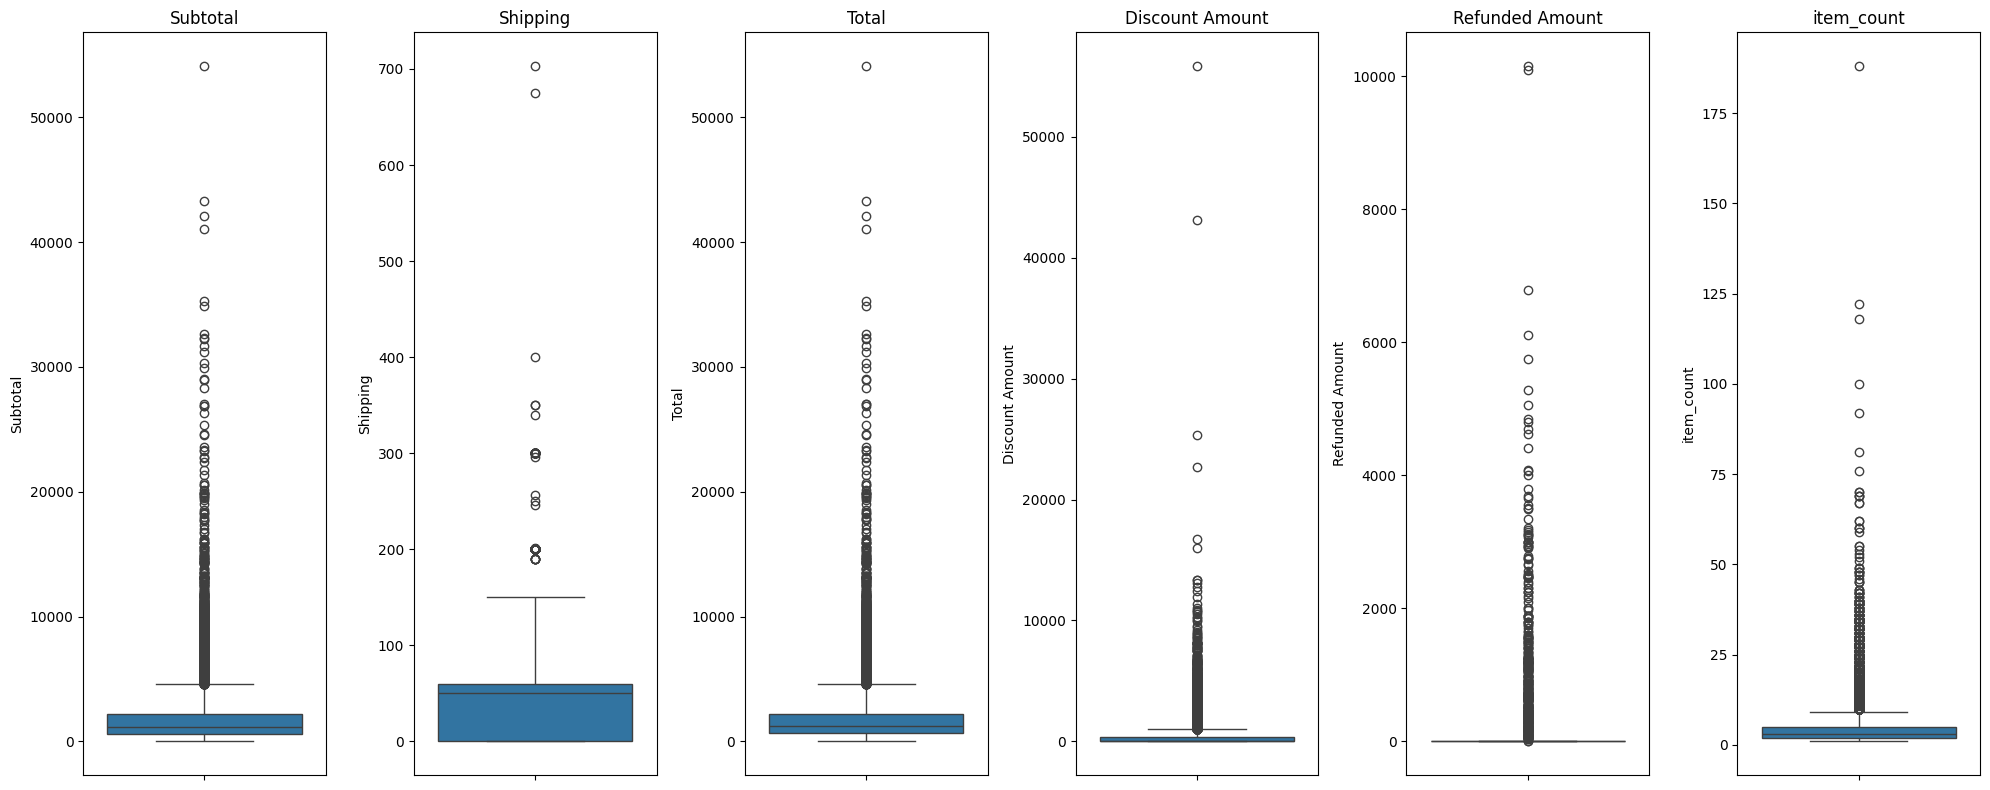

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i) 
    sns.boxplot(y=df[column])
    plt.title(column)
    
plt.tight_layout()
plt.show()

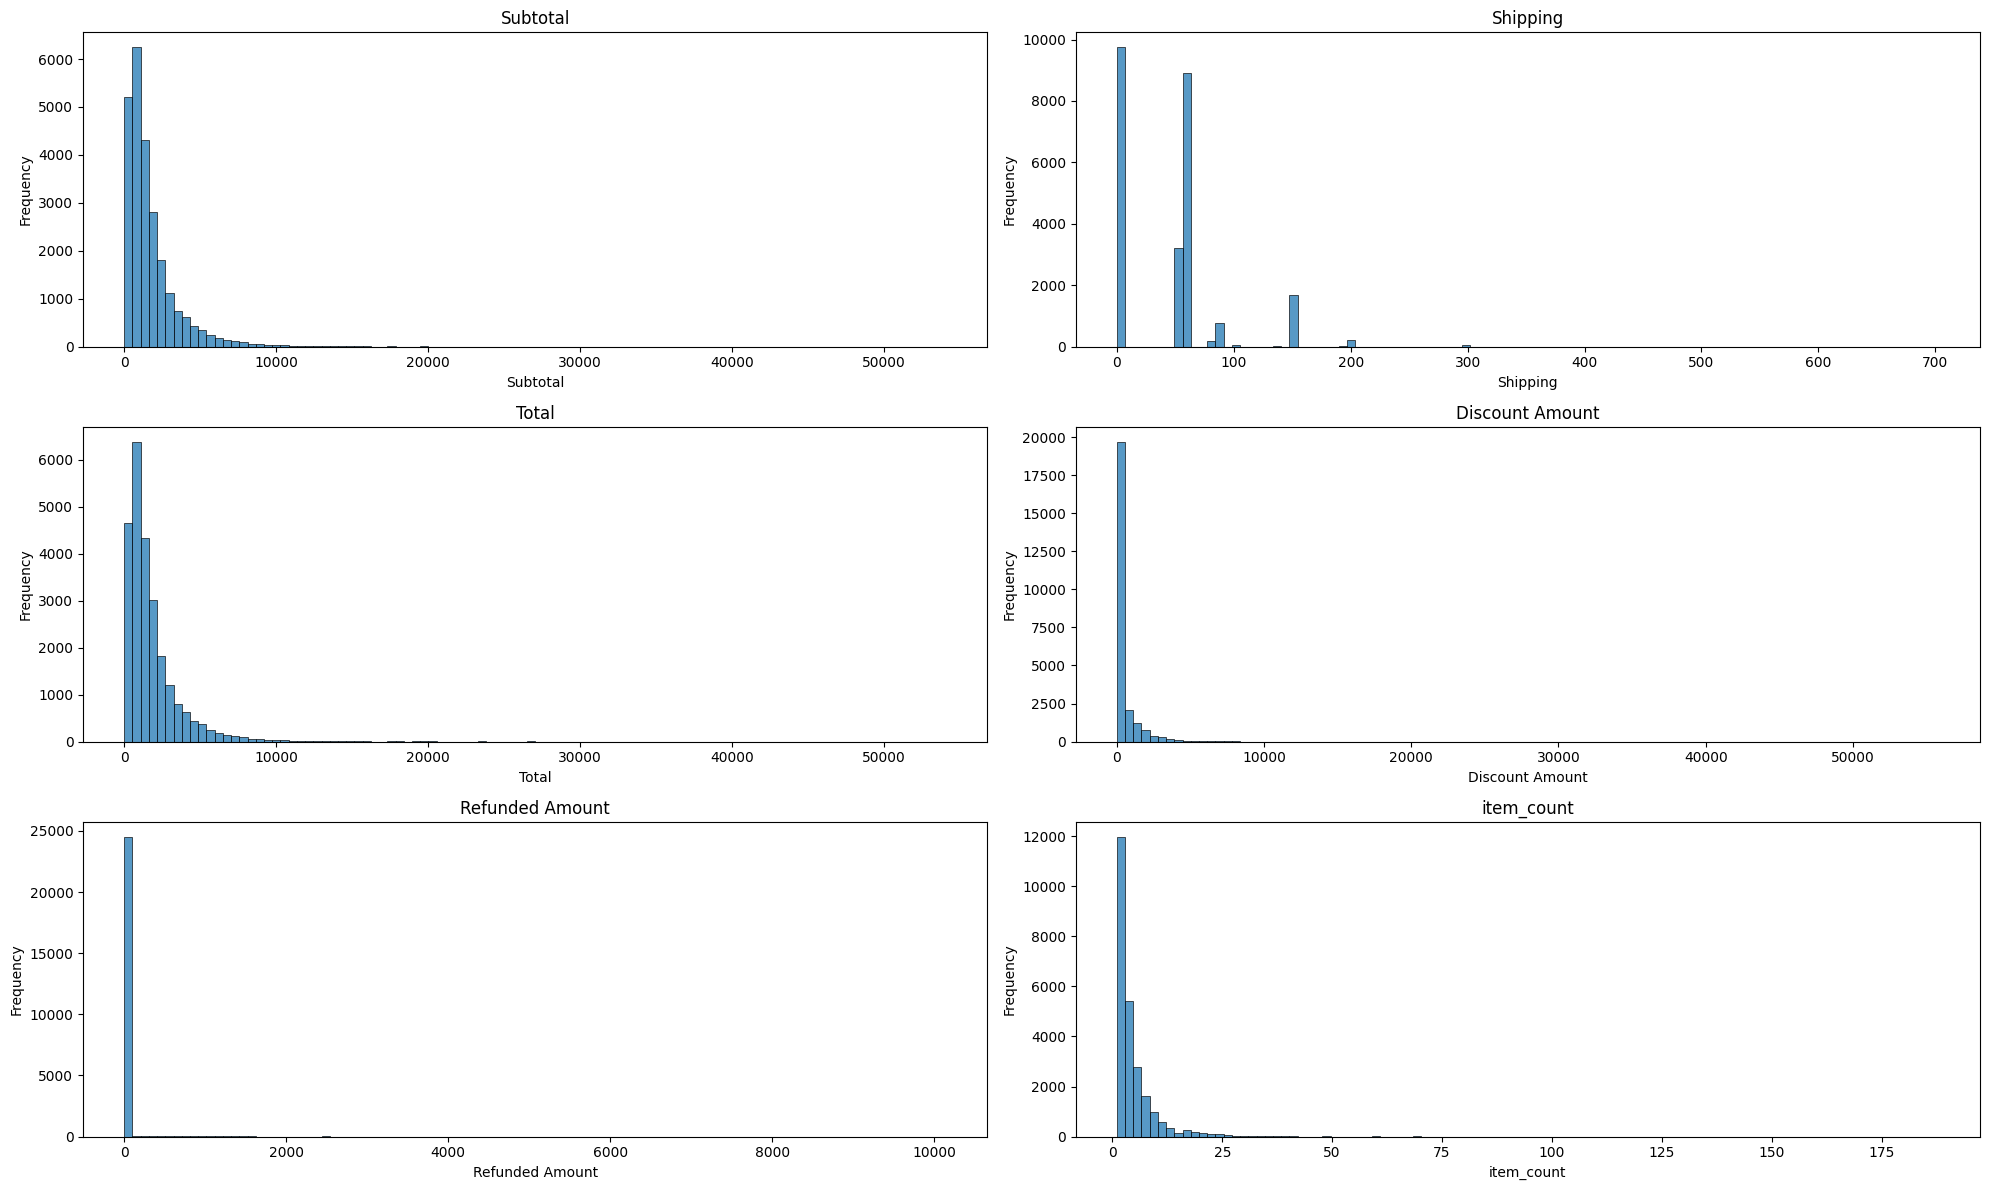

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 12))

num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2 

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)  
    sns.histplot(x=df[column], bins=100)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

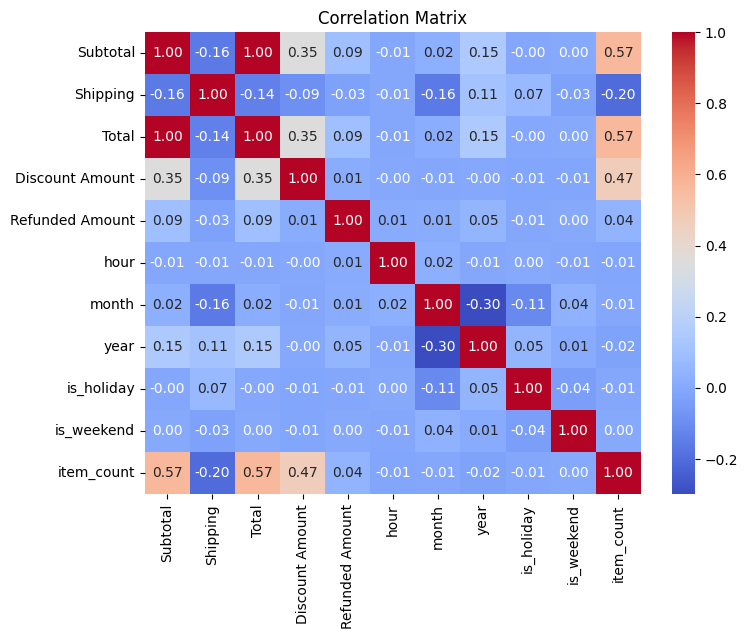

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

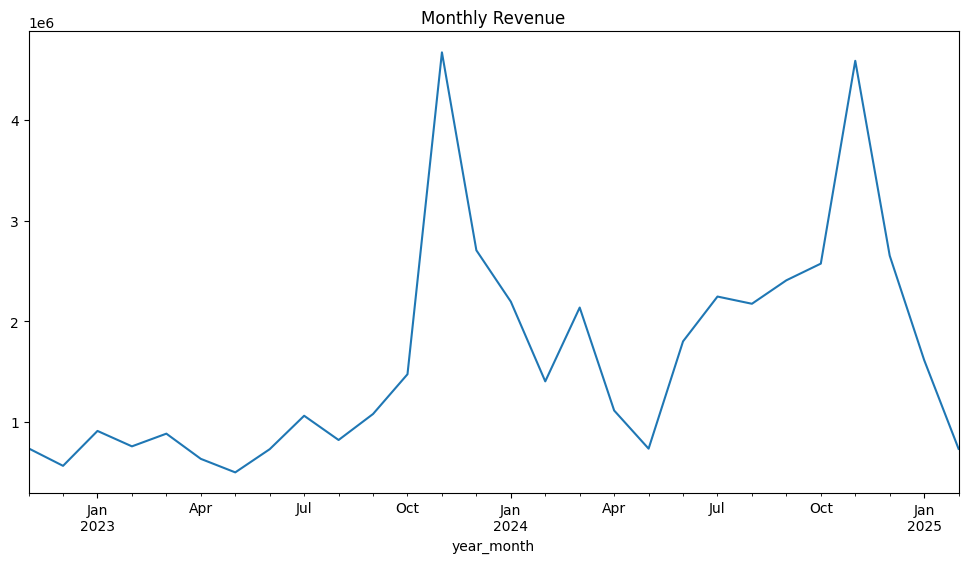

In [ ]:
monthly_revenue = df.groupby('year_month')['Total'].sum()
monthly_revenue.plot(kind='line', figsize=(12, 6), title='Monthly Revenue')
plt.show()

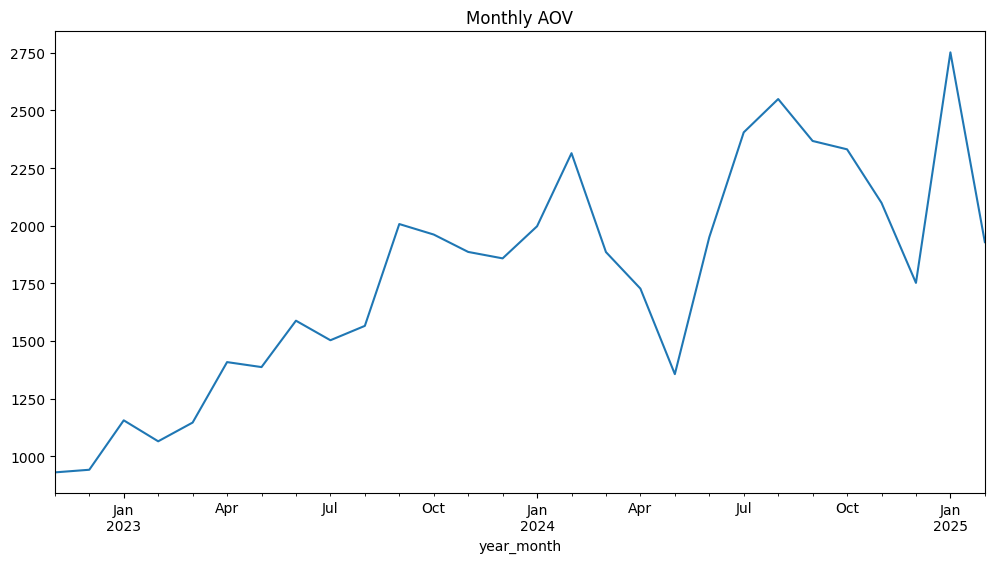

In [ ]:
monthly_aov = df.groupby('year_month')['Total'].mean()
monthly_aov.plot(kind='line', figsize=(12, 6), title='Monthly AOV')
plt.show()

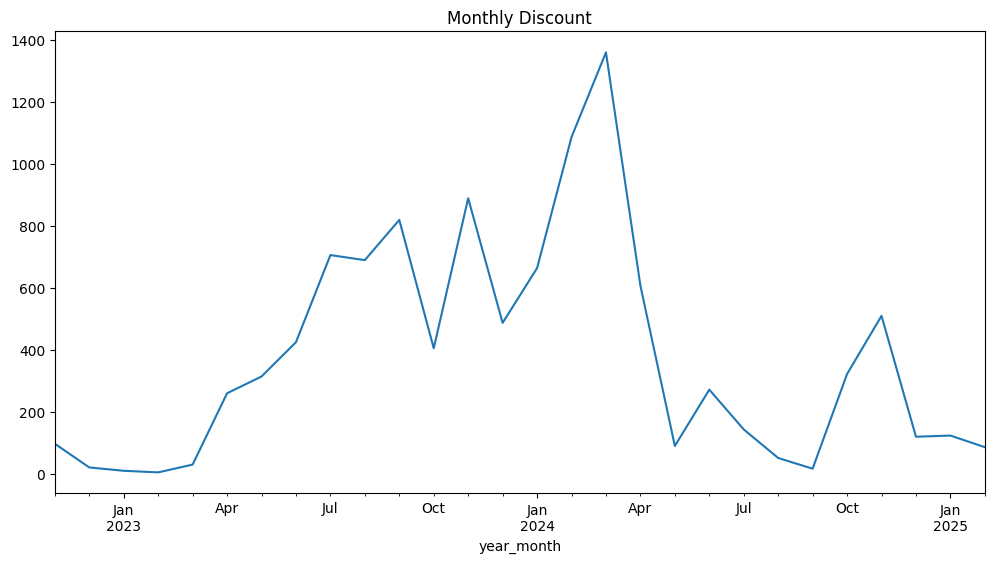

In [ ]:
monthly_discount = df.groupby('year_month')['Discount Amount'].mean()
monthly_discount.plot(kind='line', figsize=(12, 6), title='Monthly Discount')
plt.show()

Lineitem name
Plain Towels 500GSM - 30x30 / Off White    980
Pillow Protector - WHITE / 50*70           833
Plain Towels 500GSM - 30x30 / Grey         824
Plain Towels 500GSM - 30x30 / White        813
Plain Towels 500GSM - 30x30 / Coffee       664
Pillow Protector - GREY / 50*70            663
Plain Towels 500GSM - 30x30 / Mint         634
Golden Christmas Hand Towel                566
Mattress Protector - 180x200 / White       520
Olivia Kitchen Towel 30x50cm - Coffee      503
Olivia Kitchen Towel 30x50cm - Navy        499
Mattress Protector - 120x200 / White       477
Plain Towels 500GSM - 30x30 / Navy         474
Mattress Protector - 160x200 / White       470
Diamond Towel - 30x30 / Off White          460
Hollow Fiber Pillow - 1000gm               459
Waffle Towel - 30x30 / Navy                459
Waffle Towel - 30x30 / Off White           458
Mattress Protector - 180x200 / Grey        445
Waffle Towel - 30x30 / Mint                444
Name: Lineitem quantity, dtype: int64

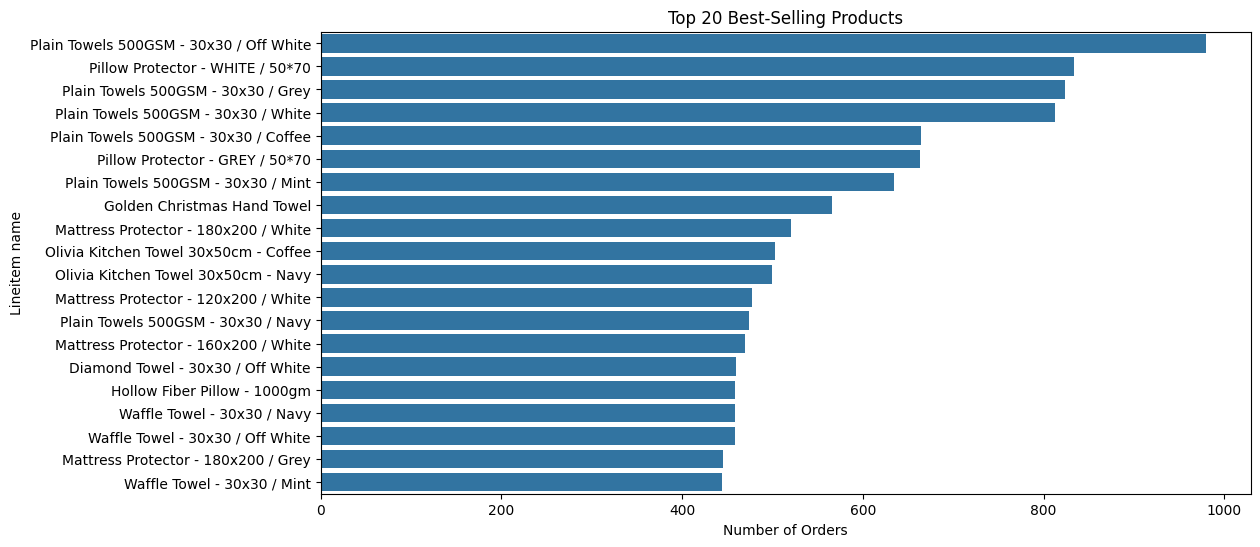

In [ ]:
all_products = df['Lineitem name'].explode()
all_products = pd.concat([all_products,df['Lineitem quantity'].explode()],axis=1)
all_products['Lineitem quantity'] = pd.to_numeric(all_products['Lineitem quantity'], errors='coerce')

top_products = all_products.groupby('Lineitem name')['Lineitem quantity'].sum().sort_values(ascending=False).head(20)
    

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 20 Best-Selling Products')
plt.xlabel('Number of Orders')
top_products

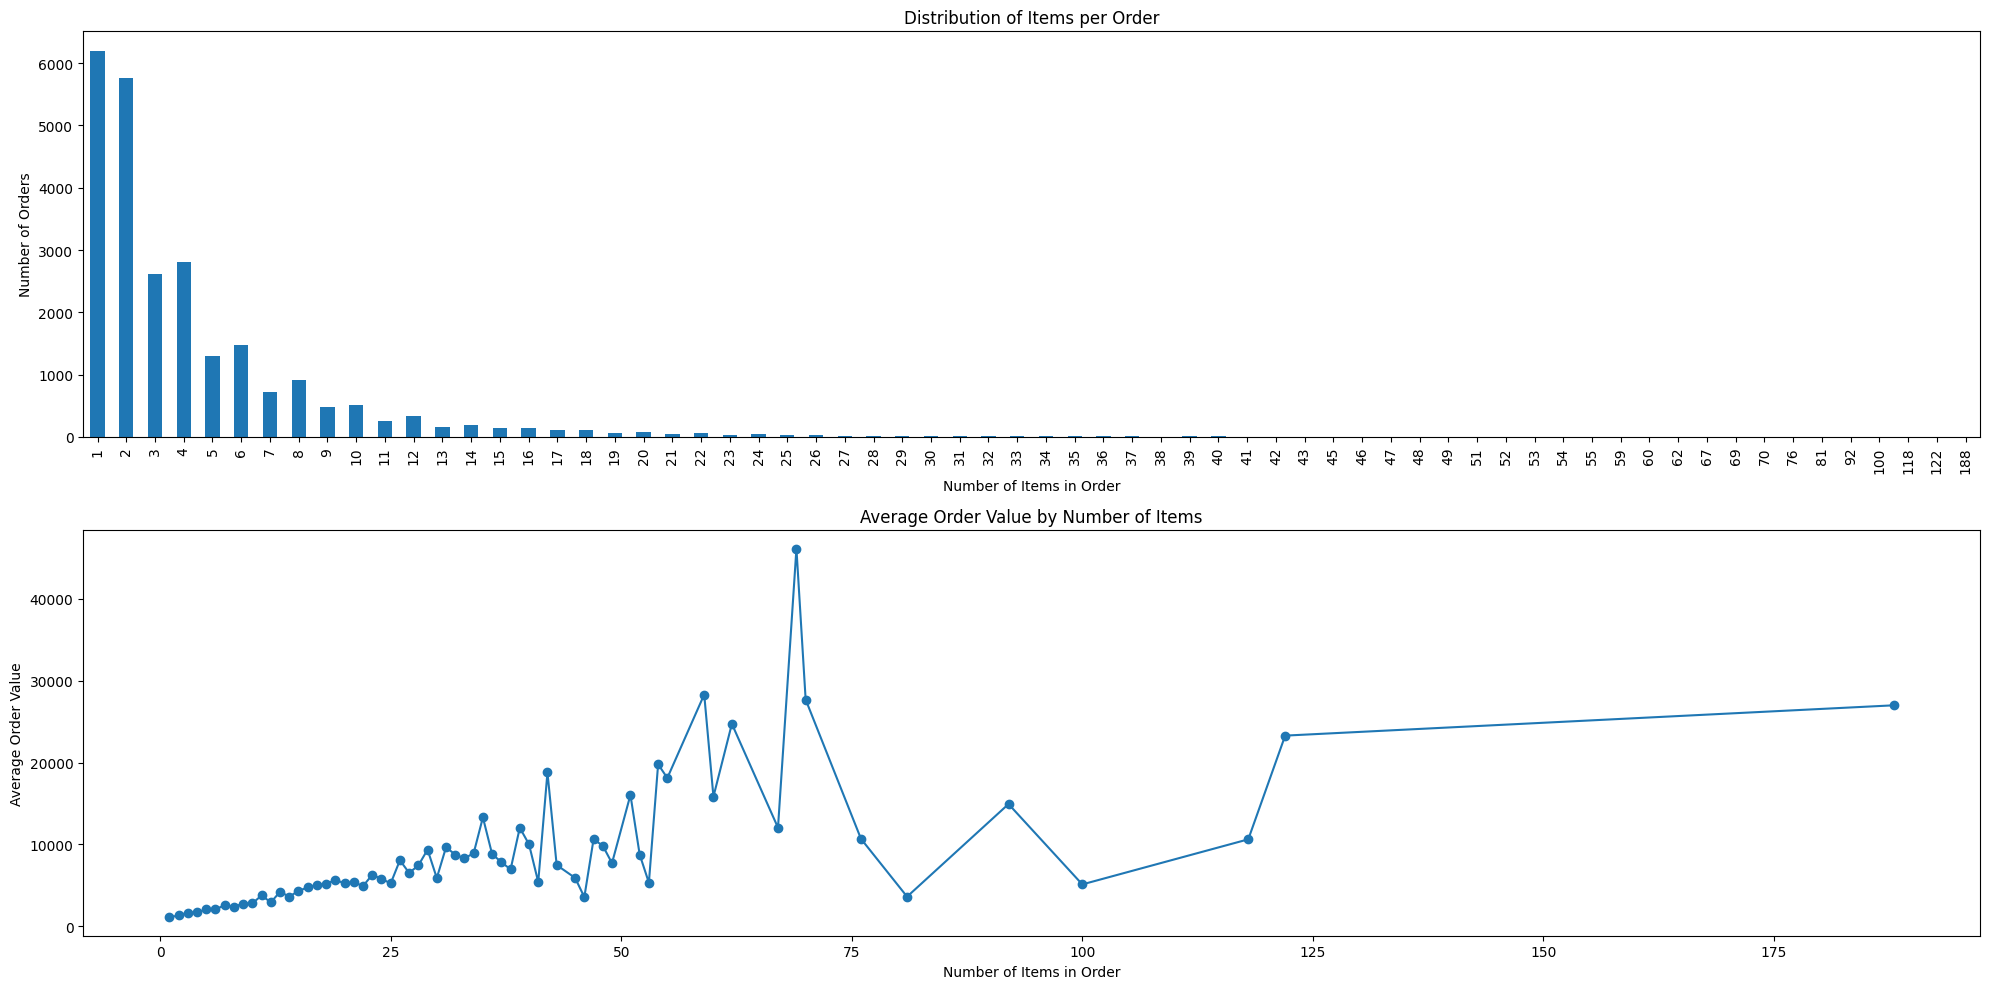


Order Size Summary:
Most common order size: 1 items
Average order size: 4.47 items
Maximum items in an order: 188
Minimum items in an order: 1


In [ ]:
plt.figure(figsize=(20, 10))
# Distribution of order sizes
plt.subplot(2, 1, 1)
df['item_count'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')

# Average order value by number of items
plt.subplot(2, 1, 2)
avg_order_value = df.groupby('item_count')['Total'].mean()
avg_order_value.plot(kind='line', marker='o')
plt.title('Average Order Value by Number of Items')
plt.xlabel('Number of Items in Order')
plt.ylabel('Average Order Value')

plt.tight_layout()
plt.show()

# Summary statistics
print("\nOrder Size Summary:")
print(f"Most common order size: {df['item_count'].mode().values[0]} items")
print(f"Average order size: {df['item_count'].mean():.2f} items")
print(f"Maximum items in an order: {df['item_count'].max()}")
print(f"Minimum items in an order: {df['item_count'].min()}")



In [ ]:
day_analysis = df.groupby('day_type').agg({
    'Total': ['count', 'mean', 'sum'],
    'item_count': ['sum'] 
}).round(2)

day_analysis.columns = ['count', 'mean', 'sum', 'items_count']

day_analysis = day_analysis.reindex(['Holiday', 'Weekday', 'Weekend'])

print("\nSales Analysis by Day Type:")
print(day_analysis)


print("\nItem Analysis:")
print(f"Average items per order: {df['item_count'].mean():.2f}")
print(f"Maximum items in an order: {df['item_count'].max()}")
print(f"Minimum items in an order: {df['item_count'].min()}")


Sales Analysis by Day Type:
          count     mean          sum  items_count
day_type                                          
Holiday     843  1804.65   1521319.14         3610
Weekday   16740  1839.30  30789799.99        74769
Weekend    7273  1858.90  13519792.57        32605

Item Analysis:
Average items per order: 4.47
Maximum items in an order: 188
Minimum items in an order: 1


In [ ]:

yearly_orders = df.groupby('year').agg({
    'Name': 'count',
    'Total': 'sum'
}).rename(columns={'Name': 'order_count'})

seasonal_analysis = df.groupby('season',observed=False).agg({
    'Name': 'count',
    'Total': ['mean', 'sum'],
})
seasonal_orders = df.groupby(['year', 'season'],observed=False)['Total'].sum().unstack()


monthly_trend = df.groupby('year_month').agg({
    'Name': 'count',
    'Total': 'sum'
})

province_yearly = df.groupby(['year', 'Shipping Province Name']).agg({
    'Name': 'count',
    'Total': 'sum'
})

pivot_province = province_yearly.reset_index().pivot(
    index='Shipping Province Name', 
    columns='year', 
    values='Total'
)



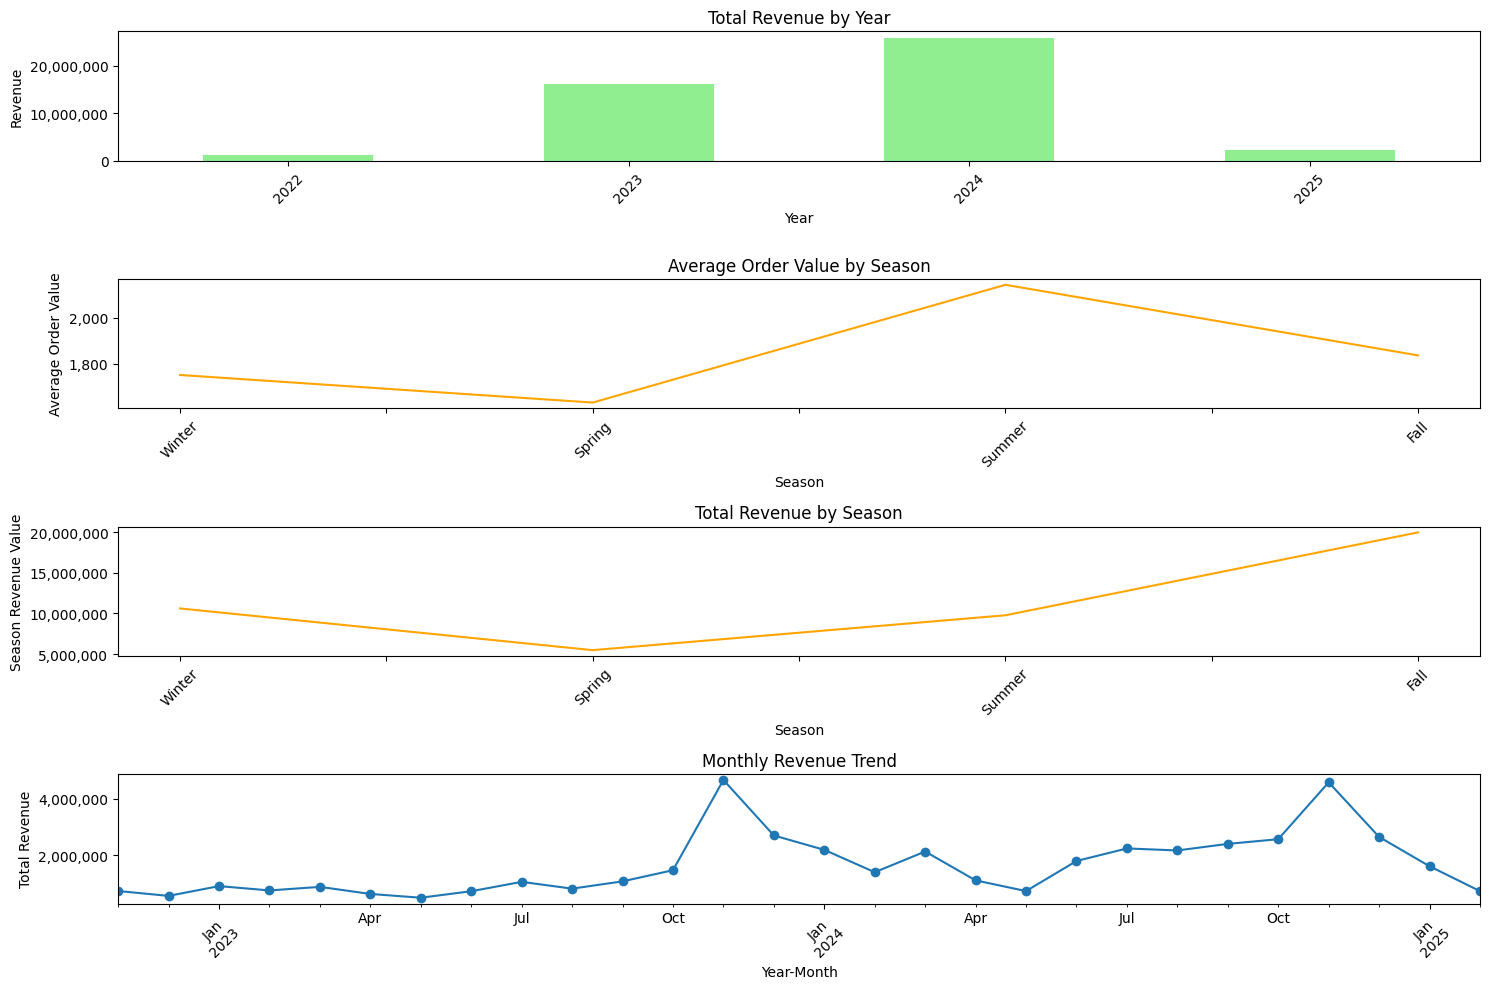

In [ ]:
plt.figure(figsize=(15, 10))

# Yearly revenue subplot
plt.subplot(4, 1, 1)
ax1 = yearly_orders['Total'].plot(kind='bar', y='Total', color='lightgreen')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

#  Seasonal Analysis
plt.subplot(4, 1, 2)
ax2 = seasonal_analysis['Total']['mean'].plot(kind='line',y='mean', color='orange')
plt.title('Average Order Value by Season')
plt.xlabel('Season')
plt.ylabel('Average Order Value')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

#  Seasonal Analysis
plt.subplot(4, 1, 3)
ax3 = seasonal_analysis['Total']['sum'].plot(kind='line',y='sum', color='orange')
plt.title('Total Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Season Revenue Value')
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

#  Monthly Trend
plt.subplot(4,1, 4)
ax4 = monthly_trend['Total'].plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



<Figure size 1500x1000 with 0 Axes>

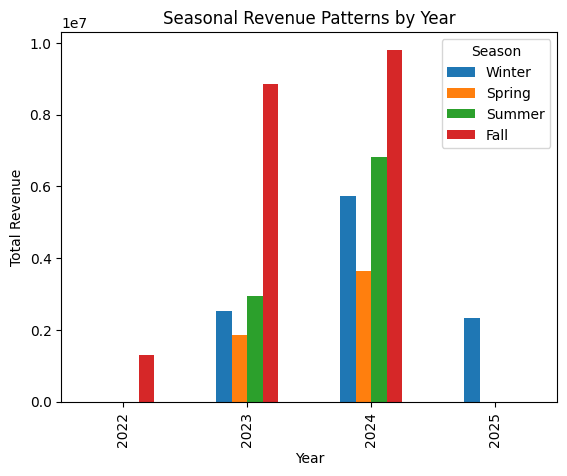

In [ ]:
plt.figure(figsize=(15,10))


seasonal_orders.plot(kind='bar')
plt.title('Seasonal Revenue Patterns by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Season')

plt.show()

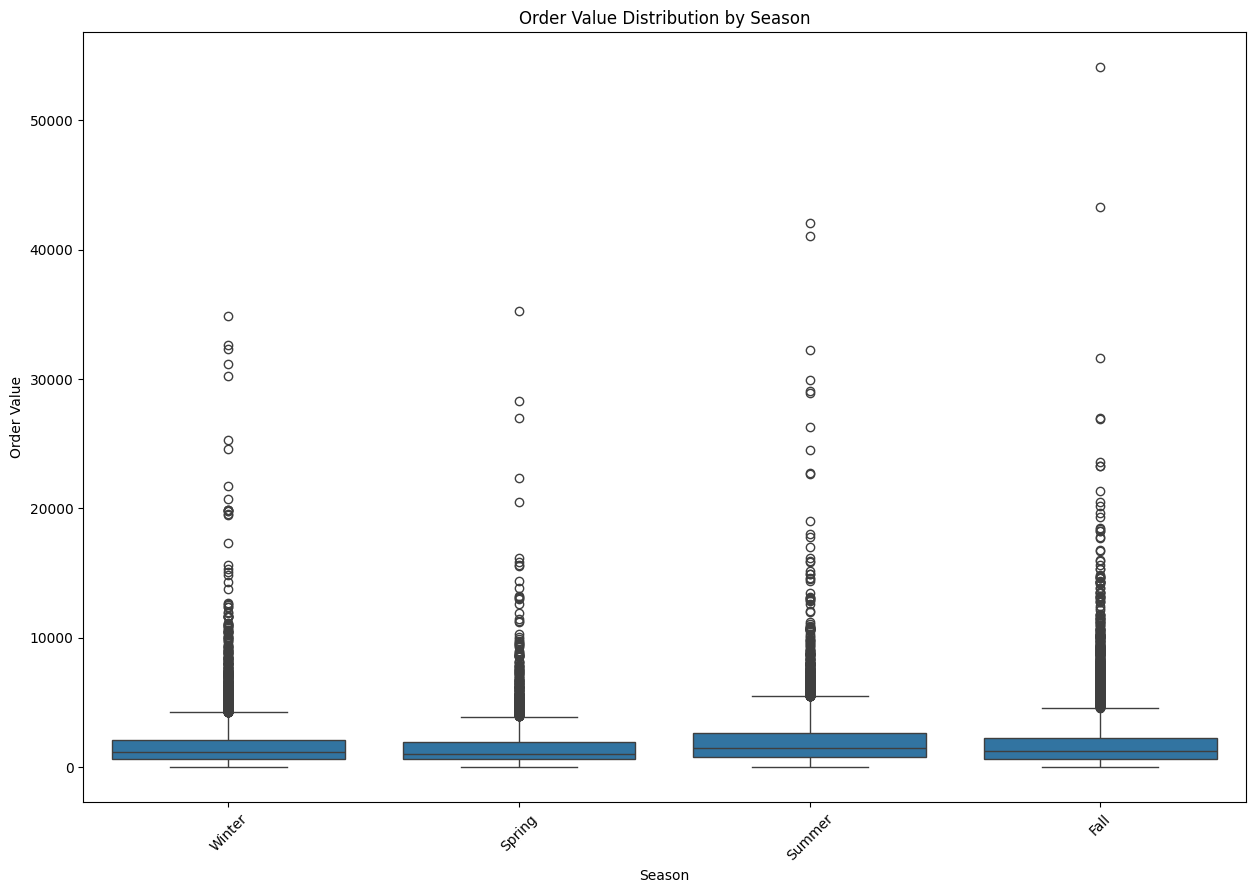

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='season', y='Total')
plt.title('Order Value Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Order Value')
plt.xticks(rotation=45)

plt.show()

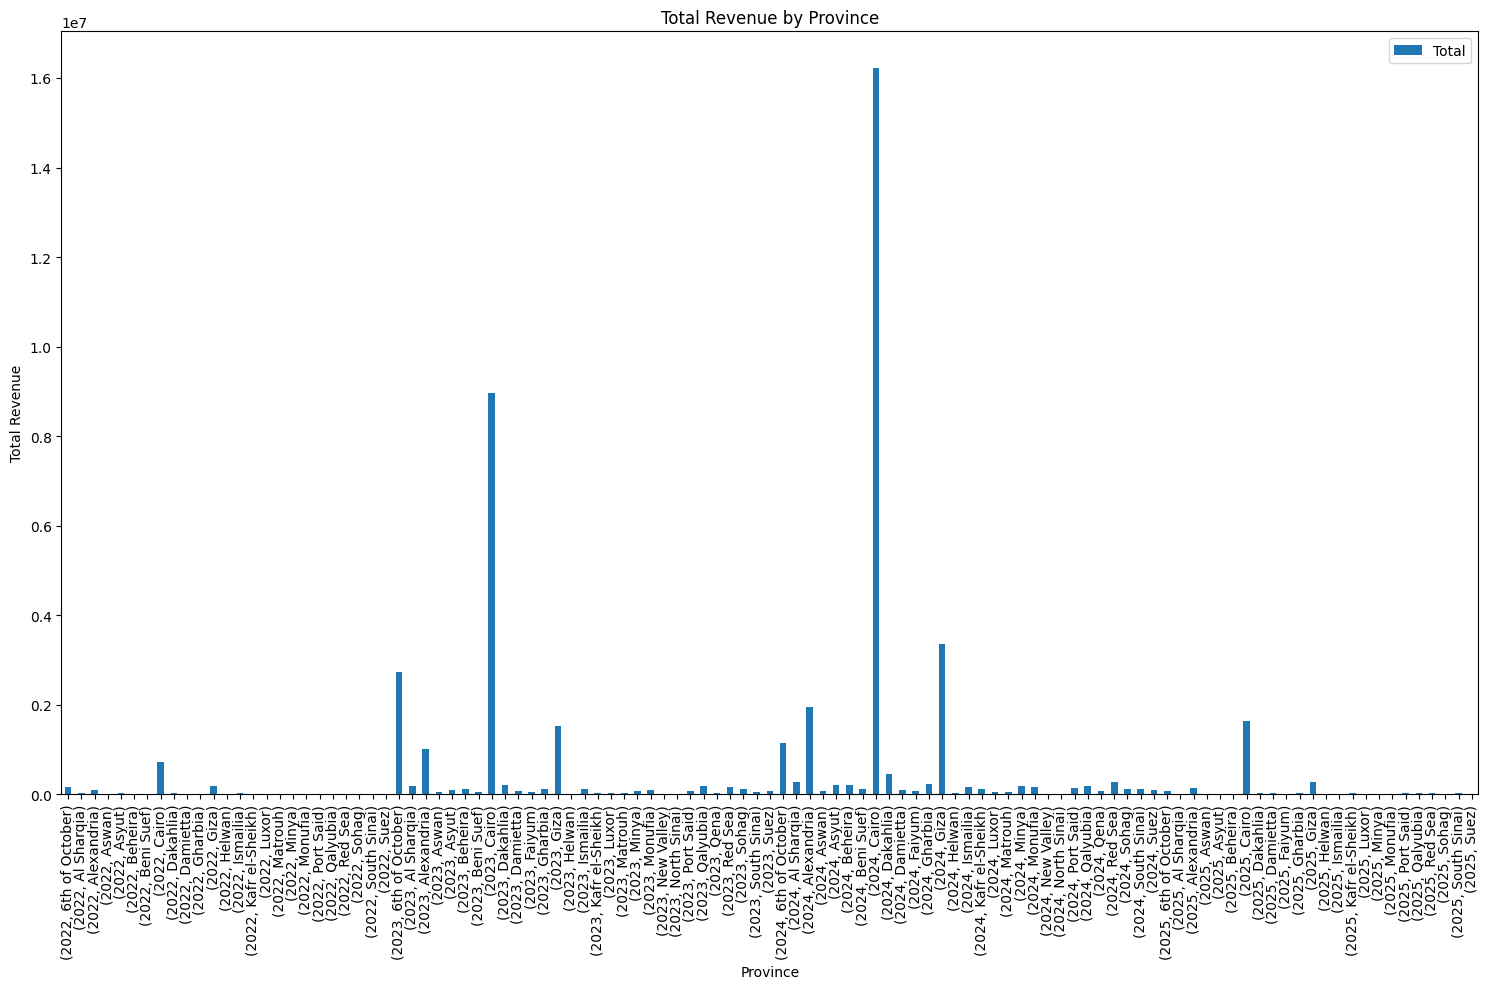

In [ ]:
province_yearly.plot(kind='bar', y='Total', figsize=(15, 10))
plt.title('Total Revenue by Province')
plt.xlabel('Province')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

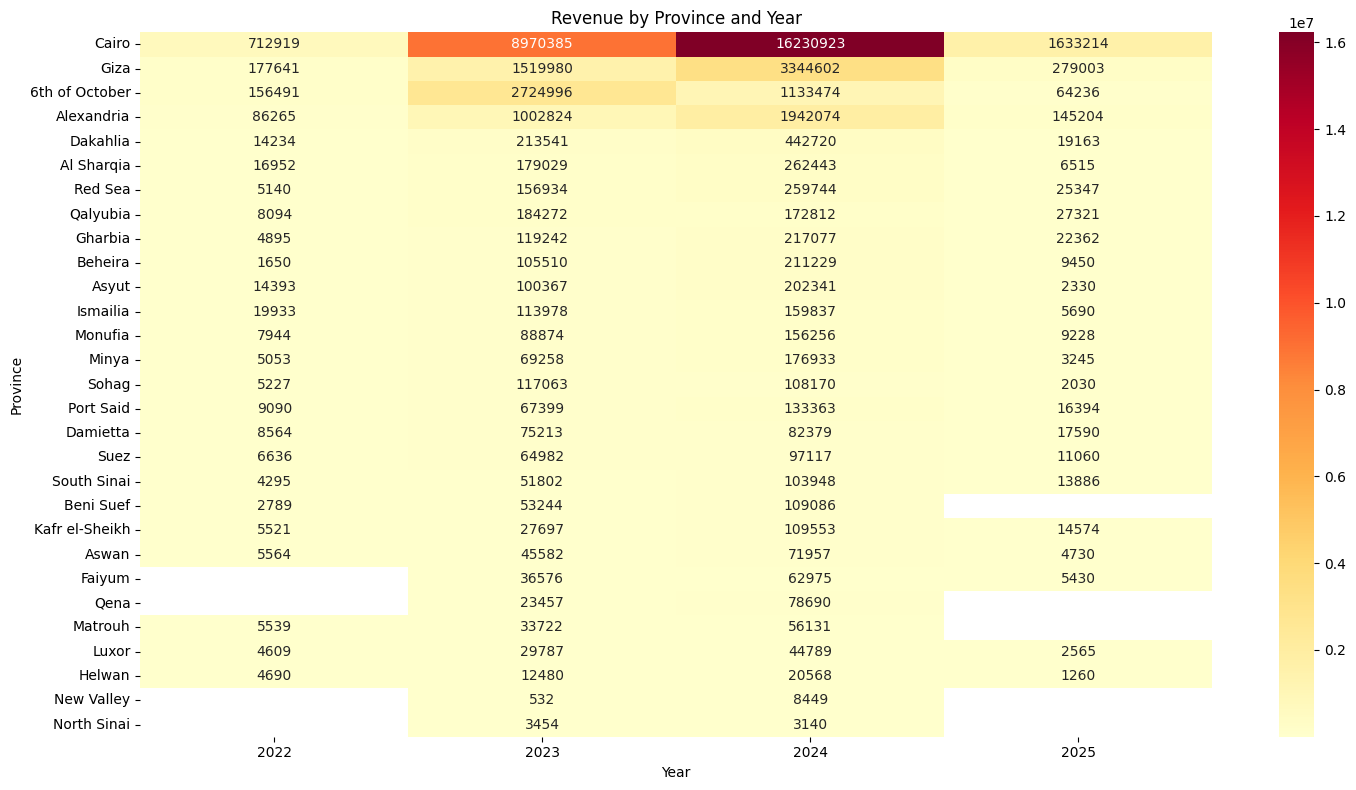

In [ ]:

plt.figure(figsize=(15, 8))
province_totals = pivot_province.sum(axis=1).sort_values(ascending=False)
pivot_province_sorted = pivot_province.reindex(province_totals.index)
sns.heatmap(pivot_province_sorted, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Revenue by Province and Year')
plt.xlabel('Year')
plt.ylabel('Province')
plt.tight_layout()
plt.show()


In [ ]:
yoy_growth = ((yearly_orders - yearly_orders.shift(1)) / yearly_orders.shift(1)) * 100

mom_growth = ((monthly_trend - monthly_trend.shift(1)) / monthly_trend.shift(1)) * 100



product_prices = []
for idx, row in df.iterrows():
    year = row['Created at'].year
    for price, product in zip(row['Lineitem price'], row['Lineitem name']):
        product_prices.append({
            'year': year,
            'product': product,
            'price': price
        })

product_df = pd.DataFrame(product_prices)

yearly_prices = product_df.groupby(['year', 'product'])['price'].mean().reset_index()

price_pivot = yearly_prices.pivot(index='product', columns='year', values='price')

yoy_changes = pd.DataFrame()
for year in range(price_pivot.columns.min()+1, price_pivot.columns.max()+1):
    
    yoy = ((price_pivot[year] - price_pivot[year-1]) / price_pivot[year-1] * 100)

    yoy = yoy.replace([np.inf, -np.inf], np.nan)
    yoy_changes[f'{year}_YoY%'] = yoy

    

final_analysis = pd.concat([price_pivot, yoy_changes], axis=1)

final_analysis = final_analysis.sort_index()




yoy_changes['Avg_Change'] = yoy_changes.abs().mean(axis=1)
print("\nOverall Price Change Statistics:")
for year in yoy_changes.columns:
    if year != 'Avg_Change':
        print(f"\nYear {year}:")
        print(f"Average Change: {yoy_changes[year].mean():.2f}%")
        print(f"Median Change: {yoy_changes[year].median():.2f}%")
        print(f"Max Increase: {yoy_changes[year].max():.2f}%")
        print(f"Max Decrease: {yoy_changes[year].min():.2f}%")





Overall Price Change Statistics:

Year 2023_YoY%:
Average Change: 47.49%
Median Change: 28.38%
Max Increase: 351.11%
Max Decrease: -53.89%

Year 2024_YoY%:
Average Change: 28.42%
Median Change: 17.65%
Max Increase: 224.66%
Max Decrease: -46.37%

Year 2025_YoY%:
Average Change: -1.24%
Median Change: 0.00%
Max Increase: 104.55%
Max Decrease: -74.29%


In [ ]:
print("\nSummary Statistics of Year-over-Year Price Changes:")
yoy_changes.describe()


Summary Statistics of Year-over-Year Price Changes:


,2023_YoY%,2024_YoY%,2025_YoY%,Avg_Change
count,454.000000,607.000000,333.000000,1249.000000
mean,47.490116,28.418311,-1.242612,38.105332
std,64.932949,43.237484,36.405764,37.280631
min,-53.887181,-46.372240,-74.285714,0.000000
25%,0.000000,-1.110191,-32.145305,11.461582
50%,28.375365,17.647059,0.000000,27.365963
75%,83.048981,52.810248,25.585023,50.651314
max,351.111111,224.658003,104.545455,265.151786


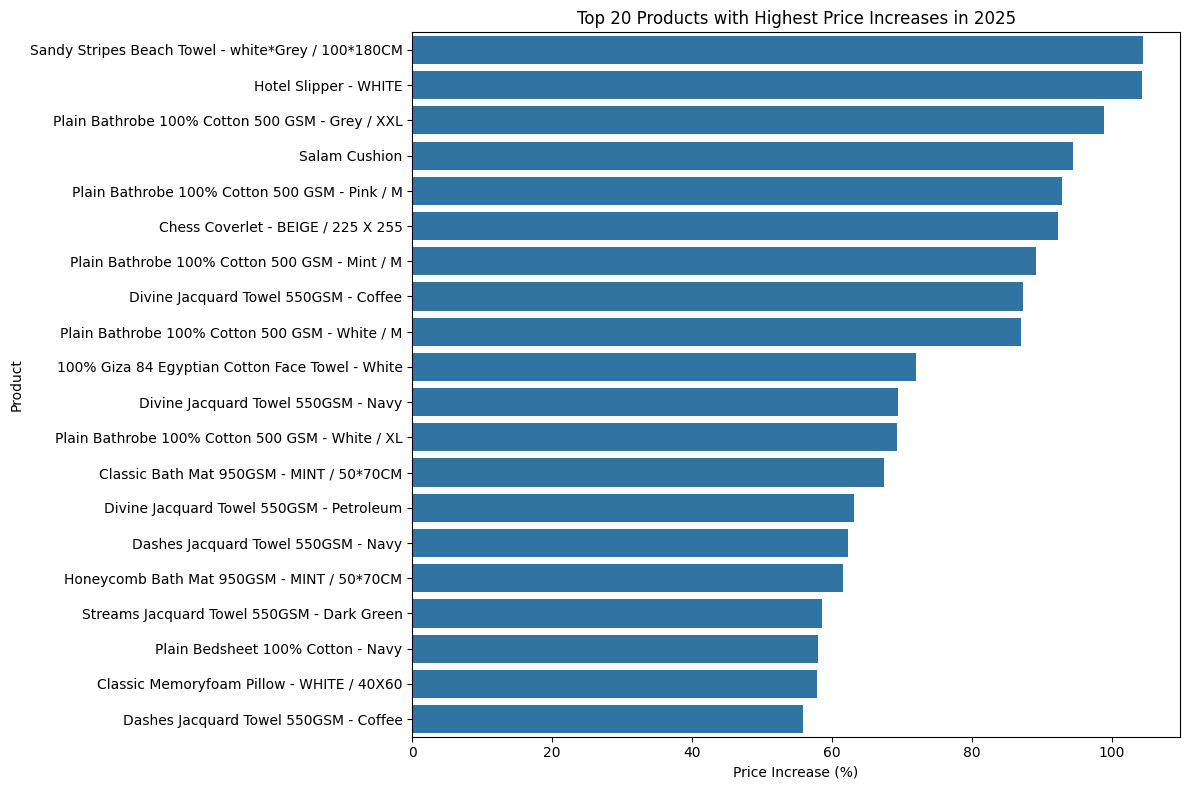

In [ ]:
plt.figure(figsize=(12,8))

latest_year = f'{price_pivot.columns.max()}_YoY%'
top_20_increases = yoy_changes[latest_year].sort_values(ascending=False).head(20)

sns.barplot(x=top_20_increases.values, y=top_20_increases.index)
plt.title(f'Top 20 Products with Highest Price Increases in {price_pivot.columns.max()}')
plt.xlabel('Price Increase (%)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

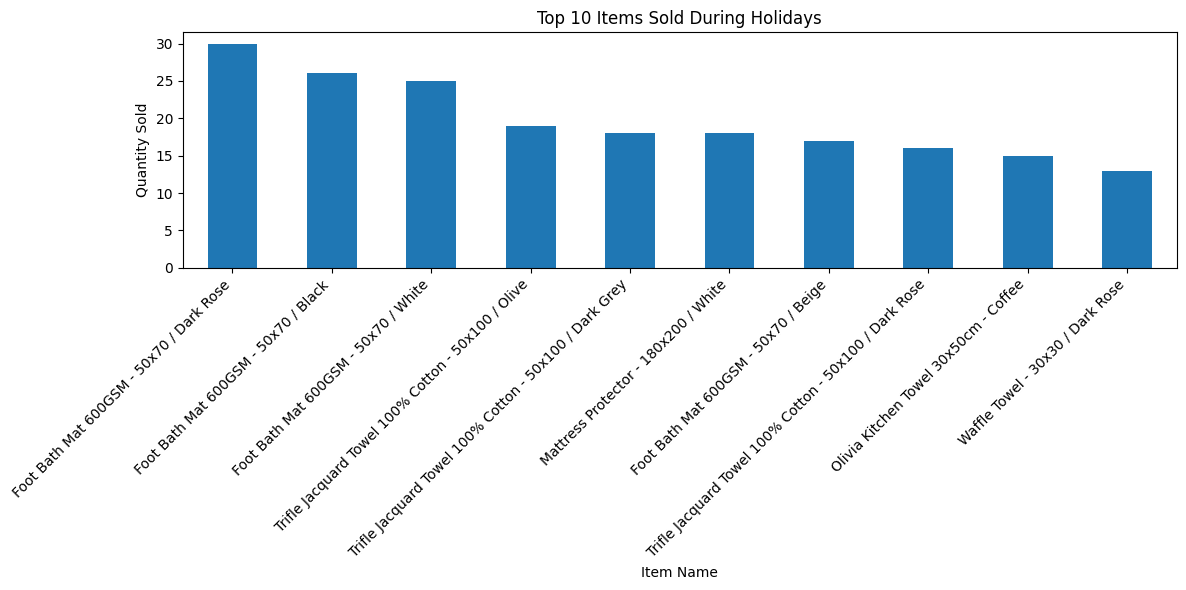

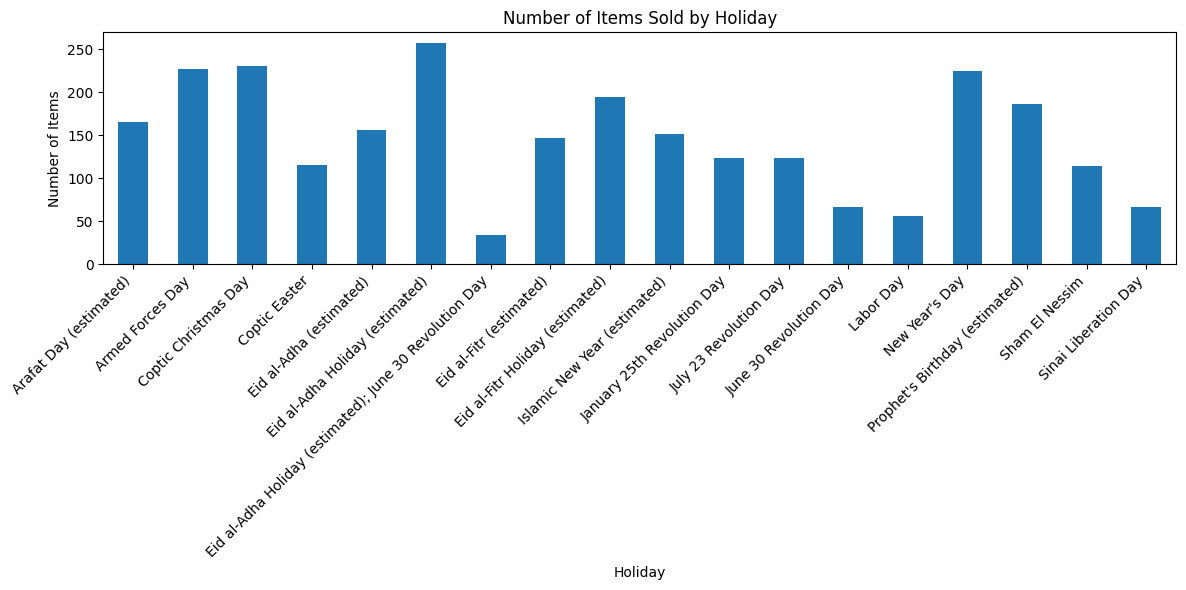

In [ ]:
if df['is_holiday'].any():
    holiday_items = []
    
    # Process each holiday order
    holiday_orders = df[df['is_holiday']]
    for _, row in holiday_orders.iterrows():
        items = row['Lineitem name']
        prices = row['Lineitem price']
        holiday = row['holiday_name']

        for item, price in zip(items, prices):
            holiday_items.append({
                'holiday': holiday,
                'item': item.strip(),
                'price': float(price),
                'date': row['Created at']
            })
    
    holiday_items_df = pd.DataFrame(holiday_items)
    

    holiday_analysis = holiday_items_df.groupby(['holiday', 'item']).agg({
        'item': 'count',
        'price': ['mean', 'sum']
    }).round(2)
    
    holiday_analysis.columns = ['quantity_sold', 'avg_price', 'total_revenue']
    

    
    # Top items sold during holidays
    top_holiday_items = holiday_items_df.groupby('item')['item'].count().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    top_holiday_items.plot(kind='bar')
    plt.title('Top 10 Items Sold During Holidays')
    plt.xlabel('Item Name')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Sales distribution by holiday
    plt.figure(figsize=(12, 6))
    holiday_items_df.groupby('holiday')['item'].count().plot(kind='bar')
    plt.title('Number of Items Sold by Holiday')
    plt.xlabel('Holiday')
    plt.ylabel('Number of Items')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Text(0, 0.5, 'Frequency')

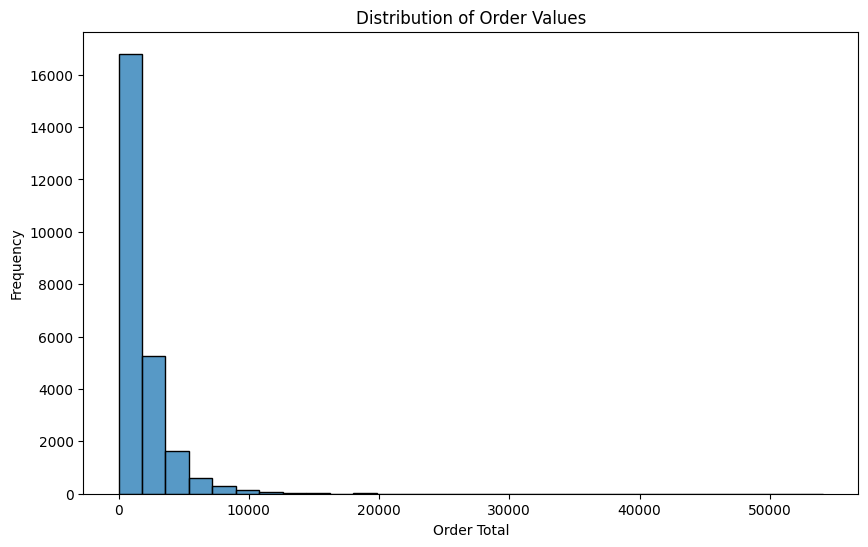

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Subtotal'], bins=30)
plt.title('Distribution of Order Values')
plt.xlabel('Order Total')
plt.ylabel('Frequency')